<a href="https://colab.research.google.com/github/shikhaguptadr/ML-PROJECTS/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# <b> <u> Implementing Logistic Regression in Python </u></b>

### Let us now start implementing what we learned from the previous section into python codes. We will use the Telco Customer Churn data.

## <b>What is Churn Prediction? </b>

### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

## <b>About Data </b>

* ### customerID : Customer ID
* ### gender : Whether the customer is a male or a female
* ### SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* ### Partner : Whether the customer has a partner or not (Yes, No)
* ### Dependents : Whether the customer has dependents or not (Yes, No)
* ### tenure : Number of months the customer has stayed with the company
* ### PhoneService : Whether the customer has a phone service or not (Yes, No)
* ### MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* ### InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* ### OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* ### OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* ### DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* ### TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* ### StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* ### StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* ### Contract : The contract term of the customer (Month-to-month, One year, Two year)
* ### PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* ### PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* ### MonthlyCharges : The amount charged to the customer monthly
* ### TotalCharges : The total amount charged to the customer
* ### Churn : Whether the customer churned or not (Yes or No)

## **Dataset initialization**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Chapter 2:- Classification Algorithms/Day 2/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})


In [ ]:
x = df[['tenure','MonthlyCharges']]
y = df['Churn']
x.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [ ]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## <b>Fitting logistic regression on train data

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[-1.30226836,  0.95882819]])

In [ ]:
model.intercept_

array([-1.41582139])

## <b>Evaluating the performance of the trained model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [ ]:
train_pred = model.predict(x_train)
train_pred
print('Train data accuracy_score :- ',accuracy_score(y_train,train_pred))
print('Train data confusion_matrix :- \n',confusion_matrix(y_train,train_pred))
print('Train data precision_score :- ',precision_score(y_train,train_pred))
print('Train data recall_score :- ',recall_score(y_train,train_pred))

Train data accuracy_score :-  0.7818601348952786
Train data confusion_matrix :- 
 [[3764  374]
 [ 855  641]]
Train data precision_score :-  0.6315270935960591
Train data recall_score :-  0.428475935828877


In [ ]:
test_pred = model.predict(x_test)
test_pred
print('Test data accuracy_score :- ',accuracy_score(y_test,test_pred))
print('Test data confusion_matrix :- \n',confusion_matrix(y_test,test_pred))
print('Test data precision_score :- ',precision_score(y_test,test_pred))
print('Test data recall_score :- ',recall_score(y_test,test_pred))

Test data accuracy_score :-  0.7984386089425124
Test data confusion_matrix :- 
 [[945  91]
 [193 180]]
Test data precision_score :-  0.6642066420664207
Test data recall_score :-  0.48257372654155495


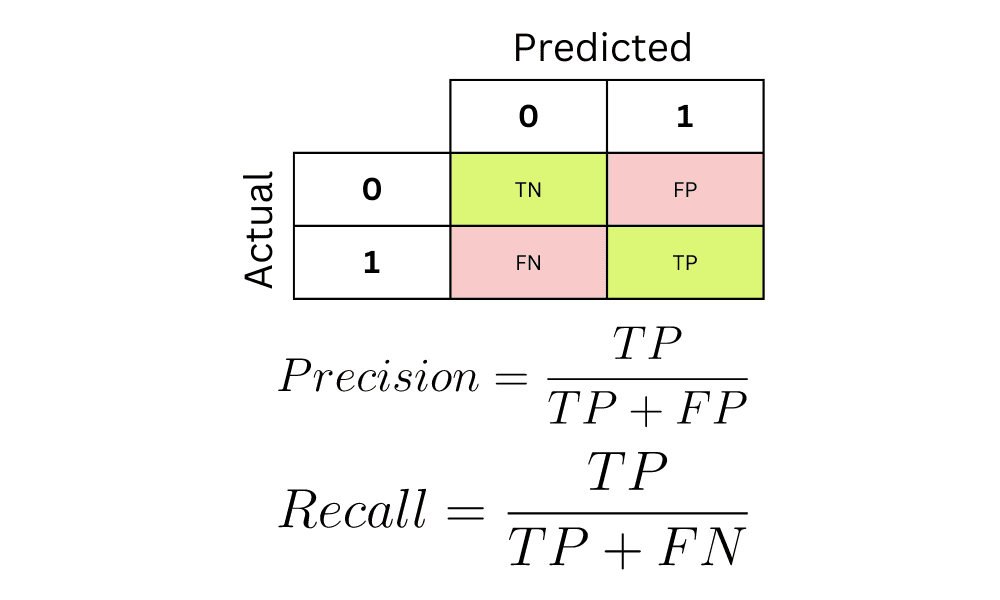

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


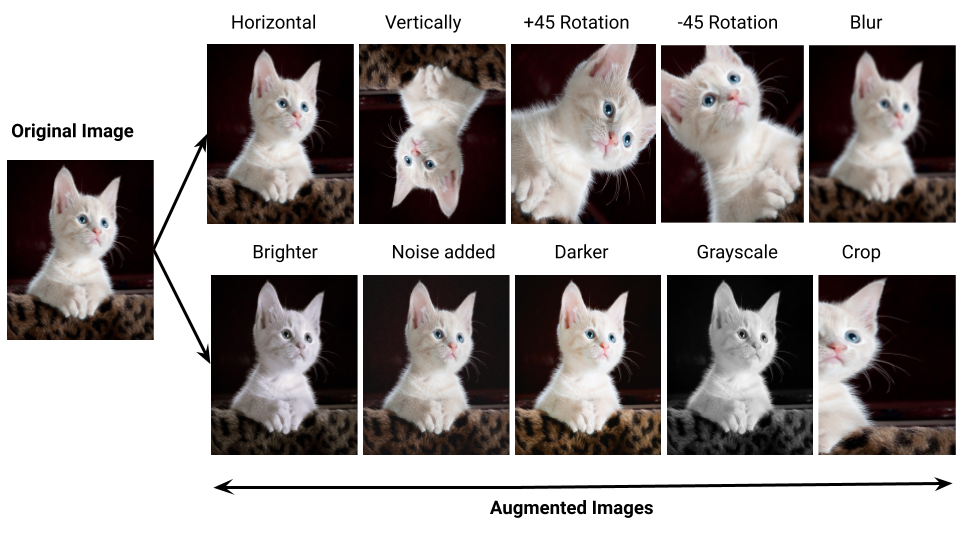